<a href="https://colab.research.google.com/github/Shubham-Das-Coder/Regression_Algorithms/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Import Required Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import files

*Uploading The File*

In [2]:
data=files.upload()

Saving Simple_Linear_Regression.csv to Simple_Linear_Regression (2).csv


*Reading The CSV File*

In [3]:
data=pd.read_csv("Simple_Linear_Regression.csv")

*Displaying The Dataset*

In [4]:
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


*Selecting The Features We Want To Consider In Predicting Values*

In [5]:
data=data[["ENGINESIZE","CO2EMISSIONS"]]

*Plot The Data*

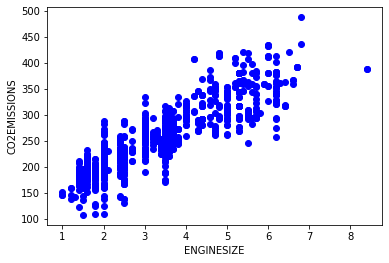

In [6]:
plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"],color="blue")
plt.ylabel("CO2EMISSIONS")
plt.xlabel("ENGINESIZE")
plt.show()

*Dividing The Data Into Training And Testing Data*

In [7]:
#We are using 80% data for training
train=data[:(int((len(data)*0.8)))]
test=data[(int((len(data)*0.8))):]

*Training Our Model*

In [8]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

train_x=np.array(train[["ENGINESIZE"]])
train_y=np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x,train_y)

print("Coefficients : ",regr.coef_)
print("Intercept : ",regr.intercept_)

Coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


*Plot The Best Fit line*

Text(0, 0.5, 'Emission')

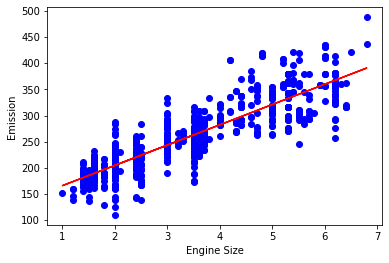

In [9]:
plt.scatter(train["ENGINESIZE"],train["CO2EMISSIONS"],color='blue')
plt.plot(train_x,regr.coef_*train_x+regr.intercept_,'-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

*Prediction Function*

In [10]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values=input_features*slope+intercept

    return predicted_values

In [11]:
my_engine_size=3.5

estimated_emission=get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print("Estimated Emission : ",estimated_emission)

Estimated Emission :  262.9528329350173


*Checking Accuracy For Test Data*

In [12]:
from sklearn.metrics import r2_score

test_x=np.array(test[['ENGINESIZE']])
test_y=np.array([['CO2EMISSIONS']])
test_y_=regr.predict(test_x)

print("Mean absolute error: %.2f" %np.mean(np.absolute(test_y_-test_y)))
print("Mean sum of squares (MSE): %.2f" %np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" %r2_score(test_y_,test_y))

UFuncTypeError: ignored